In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [238]:
#data load
train = pd.read_csv('ggstore_train.csv')
test = pd.read_csv('ggstore_test.csv')

# 1.EDA & Data Processing

In [239]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5616 entries, 0 to 5615
Data columns (total 12 columns):
App               5616 non-null object
Category          5616 non-null object
Rating            5616 non-null float64
Reviews           5616 non-null int64
Size              5616 non-null float64
Installs          5616 non-null float64
Type              5616 non-null int64
Price             5616 non-null float64
Content Rating    5616 non-null object
Genres            5616 non-null object
Last Updated      5616 non-null object
Id                5616 non-null int64
dtypes: float64(4), int64(3), object(5)
memory usage: 526.6+ KB


In [240]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 11 columns):
App               1404 non-null object
Category          1404 non-null object
Reviews           1404 non-null int64
Size              1404 non-null float64
Installs          1404 non-null float64
Type              1404 non-null int64
Price             1404 non-null float64
Content Rating    1404 non-null object
Genres            1404 non-null object
Last Updated      1404 non-null object
Id                1404 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 120.7+ KB


In [241]:
train.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Id
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,0,0.0,Everyone,Art & Design,2018-01-07,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,0,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,0,0.0,Everyone,Art & Design,2018-08-01,2
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,0,0.0,Teen,Art & Design,2018-06-08,3
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,0,0.0,Everyone,Art & Design;Creativity,2018-06-20,4


### 범주형 변수 확인

In [242]:
train['Content Rating'].value_counts()

Everyone           4531
Teen                589
Mature 17+          281
Everyone 10+        212
Adults only 18+       2
Unrated               1
Name: Content Rating, dtype: int64

In [243]:
test['Category'].value_counts()

FAMILY                 408
GAME                   175
TOOLS                  162
SPORTS                  78
FINANCE                 57
BUSINESS                56
PRODUCTIVITY            50
LIFESTYLE               49
PERSONALIZATION         47
NEWS_AND_MAGAZINES      40
COMMUNICATION           35
SOCIAL                  34
TRAVEL_AND_LOCAL        33
BOOKS_AND_REFERENCE     32
PHOTOGRAPHY             29
VIDEO_PLAYERS           22
HEALTH_AND_FITNESS      19
MAPS_AND_NAVIGATION     18
MEDICAL                 13
WEATHER                 13
AUTO_AND_VEHICLES        8
SHOPPING                 7
EVENTS                   4
BEAUTY                   3
FOOD_AND_DRINK           3
LIBRARIES_AND_DEMO       3
HOUSE_AND_HOME           2
COMICS                   1
PARENTING                1
DATING                   1
ART_AND_DESIGN           1
Name: Category, dtype: int64

In [244]:
train['Genres'].value_counts()

Tools                                    463
Entertainment                            337
Education                                309
Medical                                  253
Personalization                          227
Lifestyle                                219
Action                                   214
Finance                                  201
Photography                              175
Productivity                             173
Health & Fitness                         172
Business                                 166
Communication                            153
Sports                                   149
Shopping                                 139
Arcade                                   129
Social                                   122
Dating                                   121
News & Magazines                         114
Simulation                               110
Books & Reference                        109
Travel & Local                           107
Video Play

 - Content Rating외 다른 변수들은 범주가 너무 많이 존재한다
 - Content Rating을 더미변수화하기
 - 18+ 와 Unrated는 너무 적으므로 제거

In [245]:
train = train[train['Content Rating'] != 'Adults only 18+']
train = train[train['Content Rating'] != 'Unrated']

In [246]:
test = test[test['Content Rating'] != 'Adults only 18+']
test = test[test['Content Rating'] != 'Unrated']

In [247]:
dummy_train = pd.get_dummies(train['Content Rating'], drop_first=True)
dummy_test = pd.get_dummies(test['Content Rating'], drop_first=True)

 - 나중에 연속형 변수들 데이터프레임과 concat

### 연속형 변수 확인

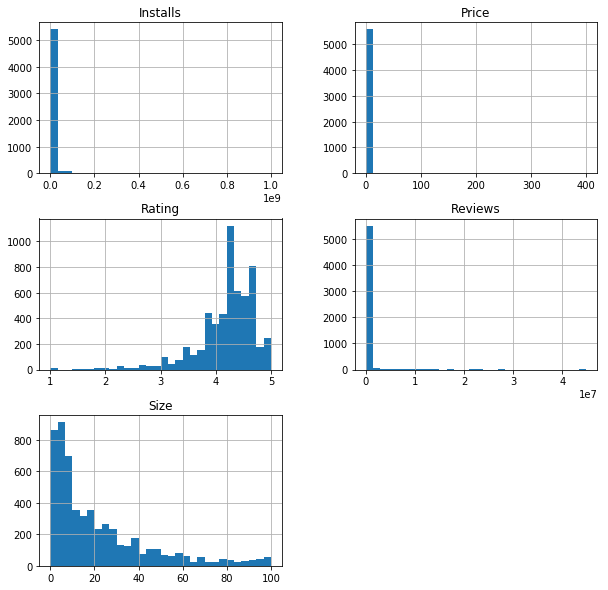

In [248]:
#연속형 변수 분포 확인
continuous = train[['Rating', 'Reviews','Size', 'Installs','Price']]
continuous.hist(bins=30,figsize=(10,10))
plt.show()

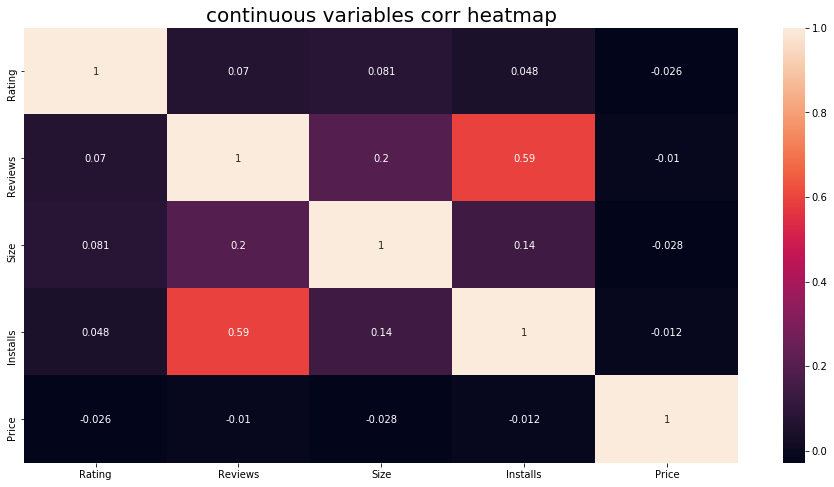

In [249]:
# 연속형 변수 heatmap 상관관계 시각화
plt.figure(figsize=(16,8))
sns.heatmap(continuous.corr(), annot=True)
plt.title('continuous variables corr heatmap', fontsize=20)

plt.show()

In [250]:
continuous = pd.concat([continuous, dummy_train], axis = 1)

### Last Updated로 업데이트 경과일수 변수 생성

In [251]:
import datetime as dt

In [252]:
def to_date(x):
    return dt.datetime.strptime(x, '%Y-%m-%d')

In [253]:
train['Last Updated'] = train['Last Updated'].map(to_date)

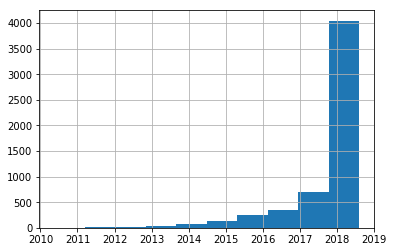

In [254]:
train['Last Updated'].hist()
plt.show()

In [255]:
def day_differ(x):
    return (dt.datetime.strptime('2018-08-31','%Y-%m-%d') - x).days

In [256]:
continuous['days_after'] = train['Last Updated'].map(day_differ)

In [257]:
#test data에도 같은 작업 반복
test['Last Updated'] = test['Last Updated'].map(to_date)
test['days_after'] = test['Last Updated'].map(day_differ)

 - 연속형 변수들에 days를 연속형 변수로 만든 후 추가
 - scaler는 minmaxscaler 적용하기
 - 위에 좀 더 시각화하기 and outlier 제거 (예시 notebook 참고)
 - test data도 같은 작업해주기
 - 그 다음 학습 

### 이상치 확인

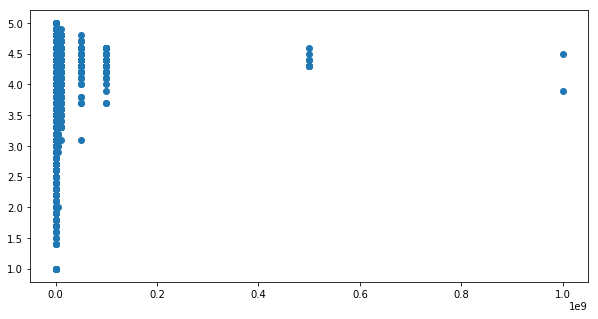

In [258]:
# Installs
plt.figure(figsize=(10,5))
plt.scatter(x = continuous['Installs'], y = continuous['Rating'])

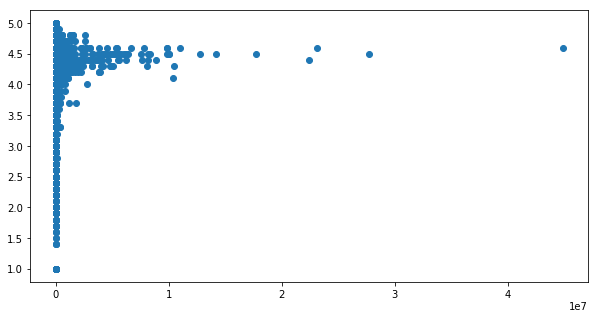

In [259]:
# Reviews
plt.figure(figsize=(10,5))
plt.scatter(x = continuous['Reviews'], y = continuous['Rating'])

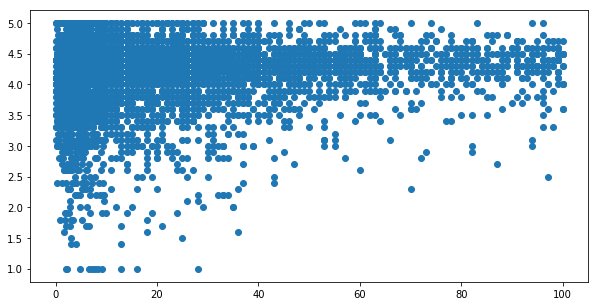

In [260]:
# Size
plt.figure(figsize=(10,5))
plt.scatter(x = continuous['Size'], y = continuous['Rating'])

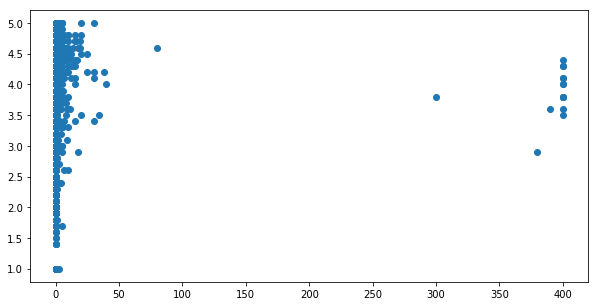

In [261]:
# Price
plt.figure(figsize=(10,5))
plt.scatter(x = continuous['Price'], y = continuous['Rating'])

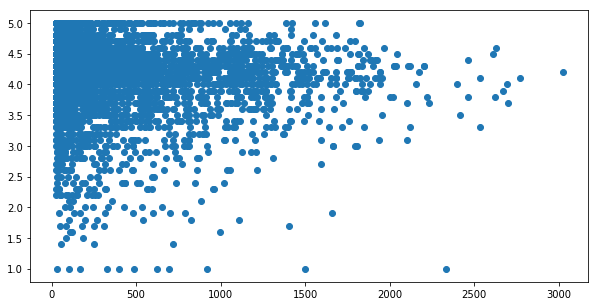

In [262]:
# day
plt.figure(figsize=(10,5))
plt.scatter(x = continuous['days_after'], y = continuous['Rating'])

In [263]:
#plot을 보고 직관적으로 수행
continuous = continuous.query('Installs < 200000000 and Price < 250 and Reviews < 40000000')
continuous.shape

(5587, 9)

In [264]:
# #더미변수 추가해주기
# continuous = pd.concat([continuous, dummy_train], axis = 1)

# 2.Regression Modeling

In [265]:
# sklearn 
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [266]:
continuous.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5587 entries, 0 to 5615
Data columns (total 9 columns):
Rating          5587 non-null float64
Reviews         5587 non-null int64
Size            5587 non-null float64
Installs        5587 non-null float64
Price           5587 non-null float64
Everyone 10+    5587 non-null uint8
Mature 17+      5587 non-null uint8
Teen            5587 non-null uint8
days_after      5587 non-null int64
dtypes: float64(4), int64(2), uint8(3)
memory usage: 321.9 KB


In [267]:
# target 분리, data split
y = continuous['Rating']
X = continuous.iloc[:,1:9]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state=318)

In [268]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1404 entries, 0 to 1403
Data columns (total 12 columns):
App               1404 non-null object
Category          1404 non-null object
Reviews           1404 non-null int64
Size              1404 non-null float64
Installs          1404 non-null float64
Type              1404 non-null int64
Price             1404 non-null float64
Content Rating    1404 non-null object
Genres            1404 non-null object
Last Updated      1404 non-null datetime64[ns]
Id                1404 non-null int64
days_after        1404 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 142.6+ KB


In [269]:
# Update test data
test_ID = test['Id']
test = test[['Reviews','Size','Installs','Price','days_after']]

In [124]:
# test = pd.concat([test, dummy_test], axis = 1)

### validation function

In [270]:
# X_train = X_train[['Reviews', 'Size','Installs','Price']]

In [271]:
n_folds = 5
train = X
def rmse_cv(model):
  kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
  rmse = np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring='neg_mean_squared_error', cv=kf))
  return (rmse)

In [272]:
def rmse(y,y_pred):
  return np.sqrt(mean_squared_error(y,y_pred))

In [273]:
from sklearn.preprocessing import MinMaxScaler

### base model

In [286]:
#linear regression
lr = make_pipeline(MinMaxScaler(), LinearRegression())

In [295]:
#knn
knn = make_pipeline(MinMaxScaler(),KNeighborsRegressor(n_neighbors = 3, weights = 'distance'))

In [288]:
#SVR
svm = make_pipeline(MinMaxScaler(),SVR())

In [289]:
#random forest
rf = make_pipeline(RandomForestRegressor())

### base model Scores

In [290]:
score = rmse_cv(lr)
print("\nLinear Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Linear Regression score: 0.5382 (0.0268)



In [296]:
score = rmse_cv(knn)     
print("\nKNN score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


KNN score: 0.6208 (0.0262)



In [292]:
score = rmse_cv(svm)     
print("\nSVM score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


SVM score: 0.5446 (0.0308)



In [293]:
score = rmse_cv(rf)     
print("\nRandom Forest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Random Forest score: 0.5336 (0.0256)



### 베이스 모델 튜닝

In [305]:
for i in range(1,5):
    knn = make_pipeline(MinMaxScaler(),KNeighborsRegressor(n_neighbors = i, weights='distance'))
    score = rmse_cv(knn)
    print(i, score.mean())

1 0.7451376657660947
2 0.6540473029823003
3 0.6208111618115248
4 0.6030722785413072


In [306]:
knn = make_pipeline(MinMaxScaler(), KNeighborsRegressor(n_neighbors = 1, weights = 'distance'))

 - knn n=1로 설정

In [309]:
for i in range(1,10):
    svm = make_pipeline(MinMaxScaler(),SVR(C = i))
    score = rmse_cv(svm)
    print(i, score.mean())

1 0.5446215586306792
2 0.5447598170906864
3 0.5451271069091213
4 0.5452203824726537
5 0.5453333431260139
6 0.5453046654569774
7 0.5452398840972327
8 0.5451518737614529
9 0.5450358209105002


In [310]:
svm = make_pipeline(MinMaxScaler(),SVR(C = 5))

 - svm c=5로 설정

### stacking

In [311]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X_train, y_train):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X_test):
        predictions = np.column_stack([
            model.predict(X_test) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [312]:
averaged_models = AveragingModels(models = (lr, svm, rf, knn))

score = rmse_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.3112 (0.0165)



In [316]:
from sklearn.ensemble import StackingRegressor

In [342]:
#linear regression
lr = make_pipeline(MinMaxScaler(), LinearRegression())
#SVR
svm = make_pipeline(MinMaxScaler(),SVR())
#knn
knn = make_pipeline(MinMaxScaler(),KNeighborsRegressor())

In [396]:
# 파라미터 설정
estimators = [
              ('lr',lr),
              ('svm',svm),
              ('knn',knn)
]
              
# Stacking
reg = StackingRegressor(
    estimators = estimators,
    final_estimator = RandomForestRegressor(n_estimators=3, random_state=42),
    cv = 10,
    n_jobs=3,
    verbose=3
    )

# fit
reg.fit(X_train, y_train)

StackingRegressor(cv=10,
                  estimators=[('lr',
                               Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                               ('linearregression',
                                                LinearRegression())])),
                              ('svm',
                               Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                               ('svr', SVR())])),
                              ('knn',
                               Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                               ('kneighborsregressor',
                                                KNeighborsRegressor())]))],
                  final_estimator=RandomForestRegressor(n_estimators=3,
                                                        random_state=42),
                  n_jobs=3, verbose=3)

In [397]:
# rmse
rmse(y_test,reg.predict(X_test))

0.6423770291129411

### GridSearch

In [380]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = {'knn__kneighborsregressor__n_neighbors':[1,2,3],
                   'svm__svr__C':[1,2,3,4]}

In [381]:
reg = StackingRegressor(
    estimators = estimators,
    final_estimator = RandomForestRegressor(n_estimators=3, random_state=42),
    cv = 10,
    n_jobs=3,
    verbose=3
    )
model_reg = GridSearchCV(reg, tuned_parameters,cv=10, verbose = 3)

In [382]:
model_reg.fit(X_train,y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] knn__kneighborsregressor__n_neighbors=1, svm__svr__C=1 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  knn__kneighborsregressor__n_neighbors=1, svm__svr__C=1, score=-0.356, total=   2.7s
[CV] knn__kneighborsregressor__n_neighbors=1, svm__svr__C=1 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV]  knn__kneighborsregressor__n_neighbors=1, svm__svr__C=1, score=-0.367, total=   3.7s
[CV] knn__kneighborsregressor__n_neighbors=1, svm__svr__C=1 ..........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.4s remaining:    0.0s


[CV]  knn__kneighborsregressor__n_neighbors=1, svm__svr__C=1, score=-0.355, total=   3.5s
[CV] knn__kneighborsregressor__n_neighbors=1, svm__svr__C=1 ..........
[CV]  knn__kneighborsregressor__n_neighbors=1, svm__svr__C=1, score=-0.405, total=   2.8s
[CV] knn__kneighborsregressor__n_neighbors=1, svm__svr__C=1 ..........
[CV]  knn__kneighborsregressor__n_neighbors=1, svm__svr__C=1, score=-0.529, total=   3.6s
[CV] knn__kneighborsregressor__n_neighbors=1, svm__svr__C=1 ..........
[CV]  knn__kneighborsregressor__n_neighbors=1, svm__svr__C=1, score=-0.275, total=   2.7s
[CV] knn__kneighborsregressor__n_neighbors=1, svm__svr__C=1 ..........
[CV]  knn__kneighborsregressor__n_neighbors=1, svm__svr__C=1, score=-0.451, total=   3.3s
[CV] knn__kneighborsregressor__n_neighbors=1, svm__svr__C=1 ..........
[CV]  knn__kneighborsregressor__n_neighbors=1, svm__svr__C=1, score=-0.453, total=   3.6s
[CV] knn__kneighborsregressor__n_neighbors=1, svm__svr__C=1 ..........
[CV]  knn__kneighborsregressor__n_

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  9.1min finished


GridSearchCV(cv=10,
             estimator=StackingRegressor(cv=10,
                                         estimators=[('lr',
                                                      Pipeline(steps=[('minmaxscaler',
                                                                       MinMaxScaler()),
                                                                      ('linearregression',
                                                                       LinearRegression())])),
                                                     ('svm',
                                                      Pipeline(steps=[('minmaxscaler',
                                                                       MinMaxScaler()),
                                                                      ('svr',
                                                                       SVR())])),
                                                     ('knn',
                                                      

In [385]:
print("Best: %f using %s" % (model_reg.best_score_, model_reg.best_params_))

Best: -0.382822 using {'knn__kneighborsregressor__n_neighbors': 3, 'svm__svr__C': 3}


In [388]:
#predict 위해 dummy 변수 concat
test = pd.concat([test, dummy_test], axis = 1)

In [389]:
stacked_pred = model_reg.predict(test.values)

In [392]:
ensemble = stacked_pred

### submission

In [393]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['Rating'] = ensemble
sub.to_csv('submission.csv', index = False)